In [1]:
import os
from pathlib import Path
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from ba_data_paths import ba_data

plt.style.use('dark_background')

%matplotlib inline

In [2]:
data_dir = Path(os.path.abspath(r"..\..\data"))
interim_dir = data_dir/'interim'
master_csv = interim_dir/'training_data.csv'

master_csv.exists()

True

In [3]:
master_df = pd.read_csv(master_csv)
master_df.fillna(0.0, inplace=True)
master_df.head()

,ID,F1yearincrements_AGE0_CY,F1yearincrements_AGE1_CY,F1yearincrements_AGE2_CY,F1yearincrements_AGE3_CY,F1yearincrements_AGE4_CY,F1yearincrements_AGE5_CY,F1yearincrements_AGE6_CY,F1yearincrements_AGE7_CY,F1yearincrements_AGE8_CY,...,proximity_kilometers_05,destination_id_06,proximity_traveltime_06,proximity_kilometers_06,trip_count_01,trip_count_02,trip_count_03,trip_count_04,trip_count_05,trip_count_06
0,530530701003,31.0,25.0,30.0,28.0,35.0,35.0,32.0,24.0,37.0,...,50.456415,216082099.0,58.905164,54.642485,0.0,2.0,0.0,0.0,0.0,0.0
1,530530714071,27.0,27.0,27.0,25.0,25.0,25.0,25.0,25.0,25.0,...,18.116390,460556608.0,35.087418,25.237232,2.0,2.0,0.0,0.0,0.0,0.0
2,530530714072,22.0,23.0,15.0,18.0,22.0,11.0,17.0,29.0,24.0,...,20.609116,460556608.0,34.472733,25.286682,3.0,0.0,0.0,0.0,1.0,0.0
3,530530714073,22.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,22.0,...,20.976263,460556608.0,35.244881,24.631002,1.0,0.0,0.0,0.0,0.0,0.0
4,530530714112,23.0,22.0,22.0,23.0,22.0,22.0,22.0,22.0,21.0,...,20.647334,677129595.0,30.820496,23.049155,7.0,0.0,1.0,0.0,0.0,0.0


In [101]:
master_df[pd.isna(master_df.trip_count_01)]

,ID,F1yearincrements_AGE0_CY,F1yearincrements_AGE1_CY,F1yearincrements_AGE2_CY,F1yearincrements_AGE3_CY,F1yearincrements_AGE4_CY,F1yearincrements_AGE5_CY,F1yearincrements_AGE6_CY,F1yearincrements_AGE7_CY,F1yearincrements_AGE8_CY,...,destination_id_06,proximity_traveltime_06,proximity_kilometers_06,trip_count_01,trip_count_02,trip_count_03,trip_count_04,trip_count_05,trip_count_06,log_trip_count


In [76]:
str_cols = master_df.select_dtypes('object').columns

In [77]:
factor_col_lst = [c for c in master_df.columns if
                  not c.startswith('destination_id') and
                  not c == 'ID' and
                  not c.endswith('_FY') and
                  not c.startswith('trip_count') and
                  not c in str_cols]
label_col = 'trip_count_01'

len(factor_col_lst)

6539

In [78]:
from scipy.stats import pearsonr
R = np.array([pearsonr(master_df.loc[:,'trip_count_01'], master_df.loc[:,c])[0] for c in factor_col_lst])

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgis\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [79]:
idx = np.argsort(R)
print(np.sort(R)[::-1][:50])

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.36315565 0.35776281 0.35564619 0.35455547
 0.35378051 0.3517103  0.35105867 0.34525925 0.34512978 0.34290524
 0.34290524 0.33868467 0.33690249 0.33656905 0.31567853 0.31369294
 0.3068132  0.30663421 0.30313658 0.30194491 0.30049051 0.30013953
 0.29746732 0.29721369 0.2971926  0.29632572 0.29346937 0.2933475
 0.2931415  0.29277986]


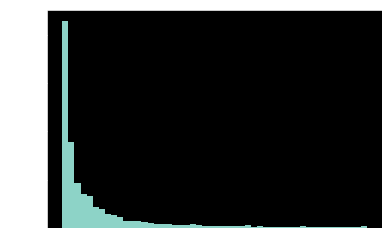

In [136]:
master_df.trip_count_01.plot.hist(range(51))

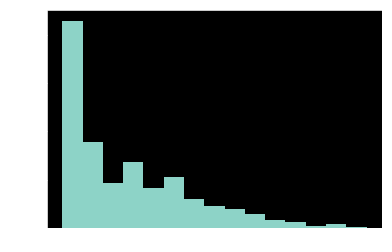

In [137]:
master_df.loc[:,'log_trip_count'] = np.log10(master_df.trip_count_01 + 1)
master_df.log_trip_count.plot.hist(15)

In [91]:
master_df.trip_count_01.describe()

count    2476.000000
mean       10.651858
std        33.763191
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max       509.000000
Name: trip_count_01, dtype: float64

In [116]:
X = master_df[factor_col_lst].copy()
std_scl = StandardScaler()
X = std_scl.fit_transform(X)
X

array([[ 0.96651735,  0.49468932,  0.83847382, ...,  3.82712076,
         3.07991409,  4.06447515],
       [ 0.65805901,  0.64482118,  0.61637977, ..., -0.16133618,
         0.37079428,  0.3674583 ],
       [ 0.27248607,  0.34455747, -0.27199645, ...,  0.14608876,
         0.30087767,  0.37367548],
       ...,
       [-0.19020145, -0.10583811, -0.04990239, ...,  3.55960115,
         2.58374599,  3.44511268],
       [ 0.04114231,  0.11935968,  0.17219166, ...,  3.62663577,
         2.65887223,  3.5134505 ],
       [ 0.1182569 , -0.70636554, -0.04990239, ...,  4.71829646,
         3.50866771,  4.62633384]])

In [117]:
y = master_df[label_col]
y.head()

0    0.0
1    2.0
2    3.0
3    1.0
4    7.0
Name: trip_count_01, dtype: float64

In [118]:
import xgboost

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [140]:
xgr = (xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.1)
    .fit(
        X_train, 
        y_train, 
        eval_set=[(X_test, y_test)], 
        eval_metric='rmse',
        early_stopping_rounds=20
    )
)

[17:19:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:26.2028
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:25.046
[2]	validation_0-rmse:24.2142
[3]	validation_0-rmse:23.9588
[4]	validation_0-rmse:22.878
[5]	validation_0-rmse:22.4424
[6]	validation_0-rmse:21.7766
[7]	validation_0-rmse:21.2982
[8]	validation_0-rmse:21.1302
[9]	validation_0-rmse:20.4183
[10]	validation_0-rmse:20.213
[11]	validation_0-rmse:19.7105
[12]	validation_0-rmse:19.4161
[13]	validation_0-rmse:19.243
[14]	validation_0-rmse:19.0652
[15]	validation_0-rmse:18.9672
[16]	validation_0-rmse:18.9239
[17]	validation_0-rmse:18.6864
[18]	validation_0-rmse:18.6755
[19]	validation_0-rmse:18.7177
[20]	validation_0-rmse:18.6348
[21]	validation_0-rmse:18.5604
[22]	validation_0-rmse:18.5588
[23]	validation_0-rmse:18.5244
[24]	validation_0-rmse:18.4903
[25]	valid

In [197]:
y_pred = xgr.predict(X_test)
r2_score(y_test, y_pred)

0.5359114800766546

In [189]:
var_lookup = ba_data.enrich_vars_dataframe.set_index('enrich_field_name')['alias']

def plot_feature_importances(model, n_features=50, importance_type='weight'):
    feature_importances = model.get_booster().get_score(importance_type=importance_type)
    feature_aliases = [var_lookup[var] if var in var_lookup.index else var for var in factor_col_lst]
    
    importance_values, feature_aliases = zip(
        *sorted(
            (v,feature_aliases[int(k.split('f')[1])]) for k,v in feature_importances.items()
        )
    )
    
    plt.figure(figsize=(15,18))
    
    plt.barh(range(n_features), importance_values[-n_features:])
    _ =plt.yticks(range(50),feature_aliases[-n_features:])
    plt.title(f"Feature Importance ({importance_type} importance)")

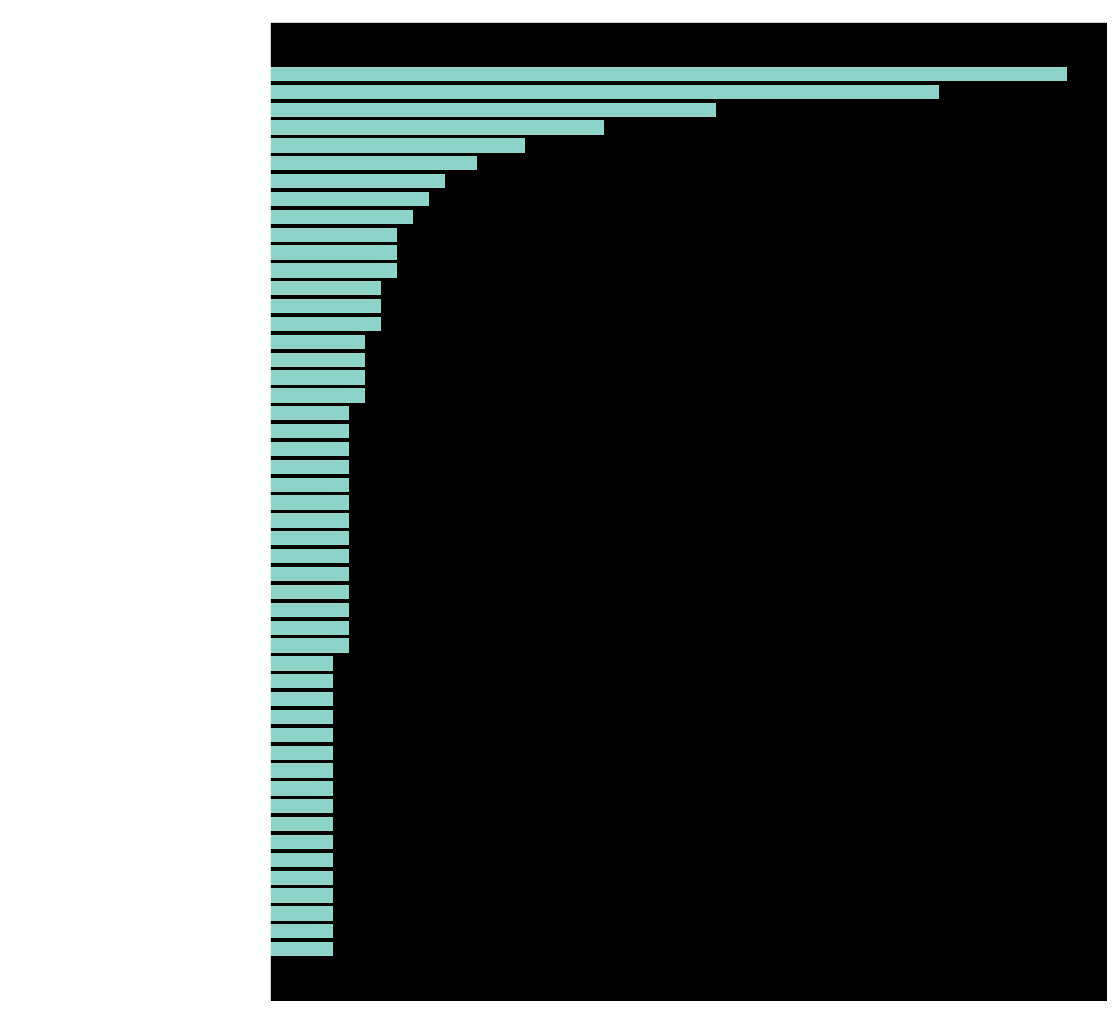

In [190]:
plot_feature_importances(xgr, 50, 'weight')

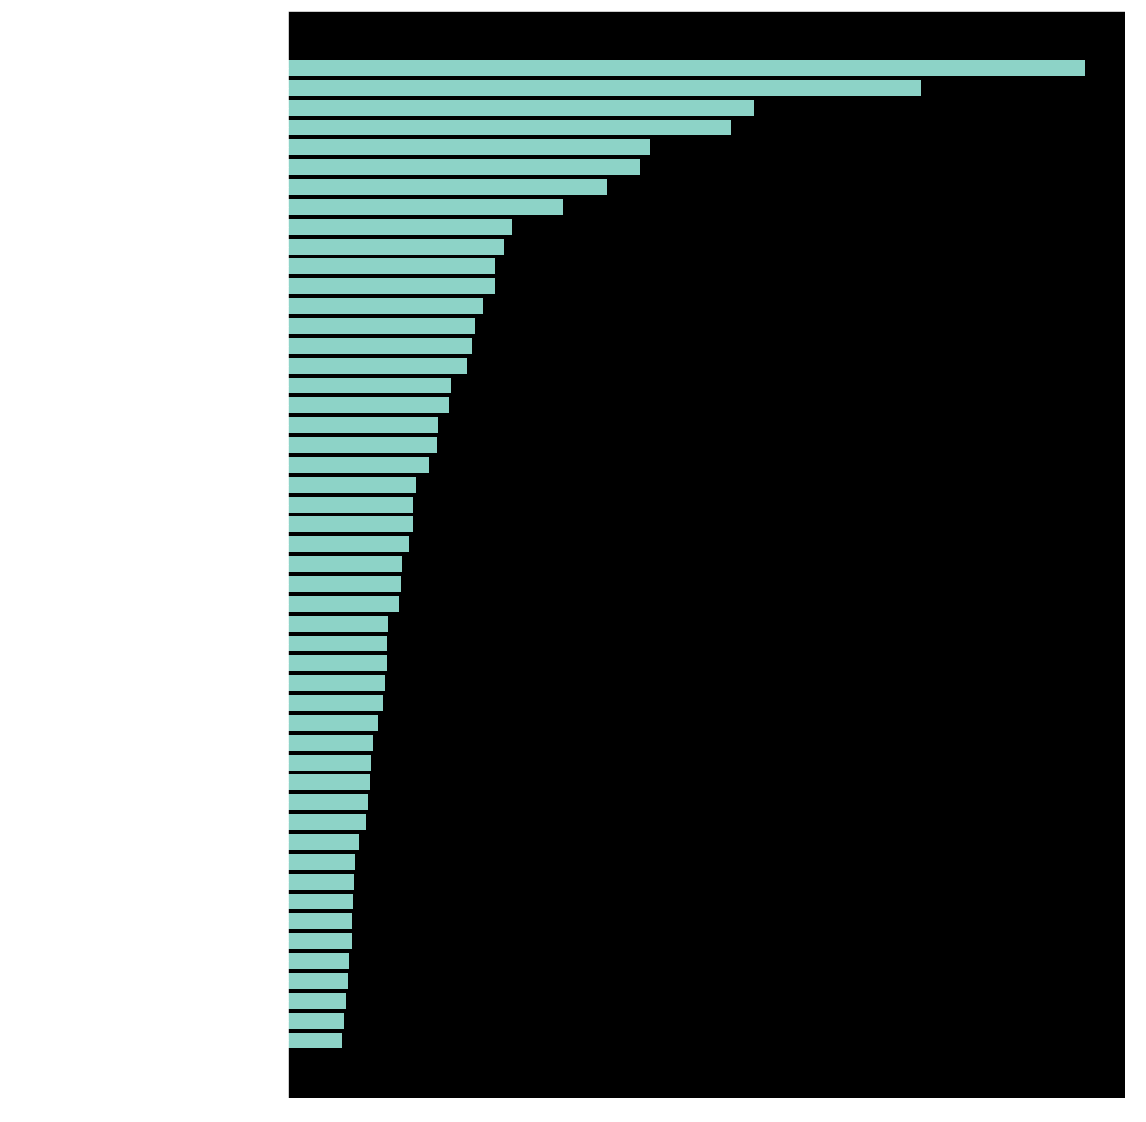

In [171]:
plot_feature_importances(xgr, 50, 'gain')

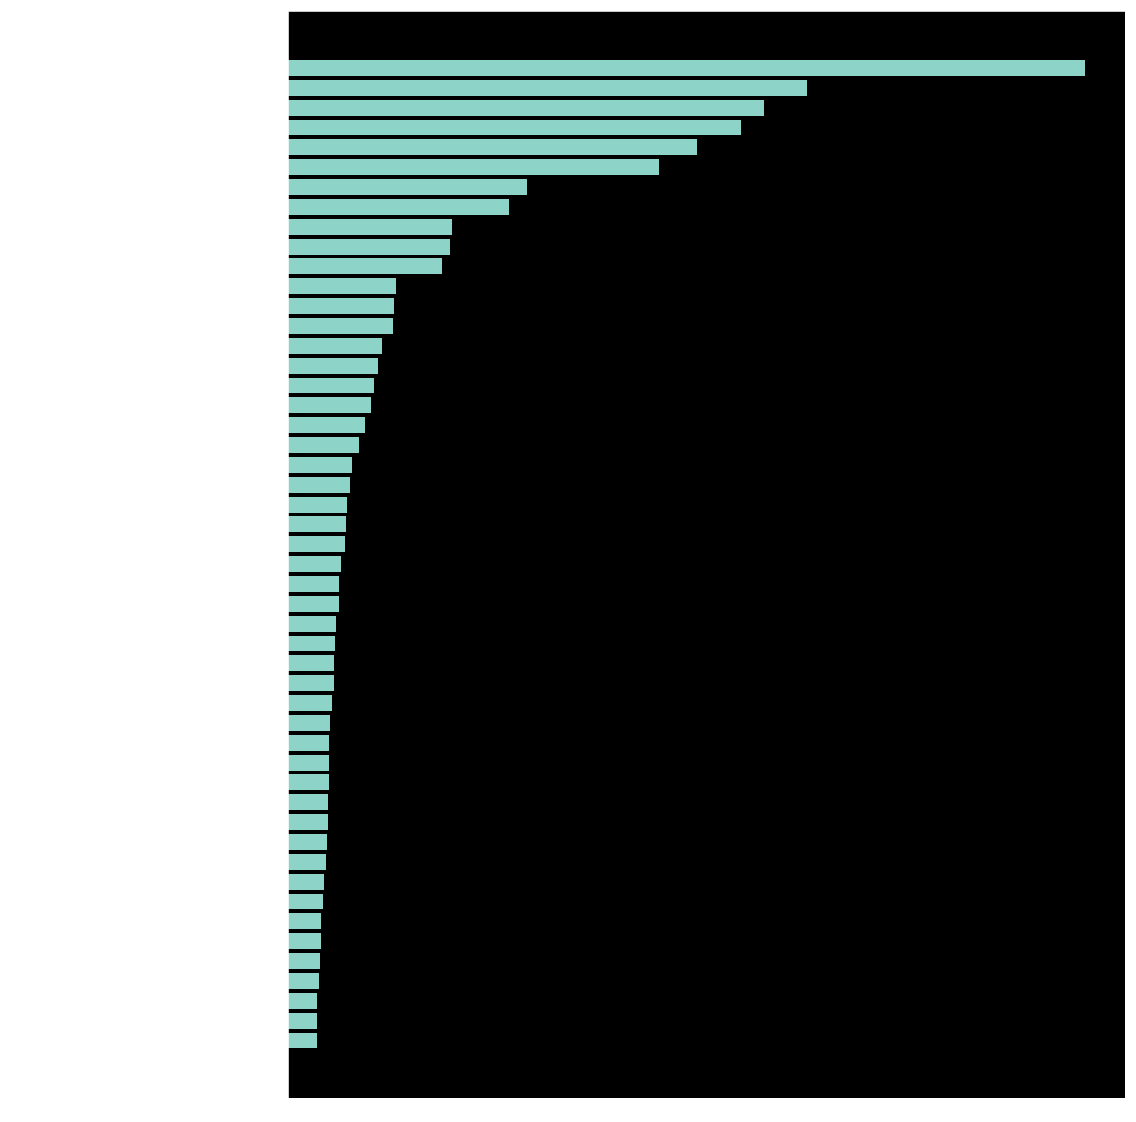

In [172]:
plot_feature_importances(xgr, 50, 'total_gain')

In [201]:
pickle.dump(xgr, open("../../models/sea_ace_xgr_stage01.pkl", "wb"))